In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy.optimize import root_scalar
import matplotlib as mpl

mpl.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "cm",   # use Computer Modern for mathtext ($...$)
    "font.size": 16,
})

['V(V)', 'I(A)', 'I uncertainty (A)', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', '0-2']
alpha = 0.000262 ± 2.35e-05,  sigma0 = 8.84e-05 ± 2.17e-05


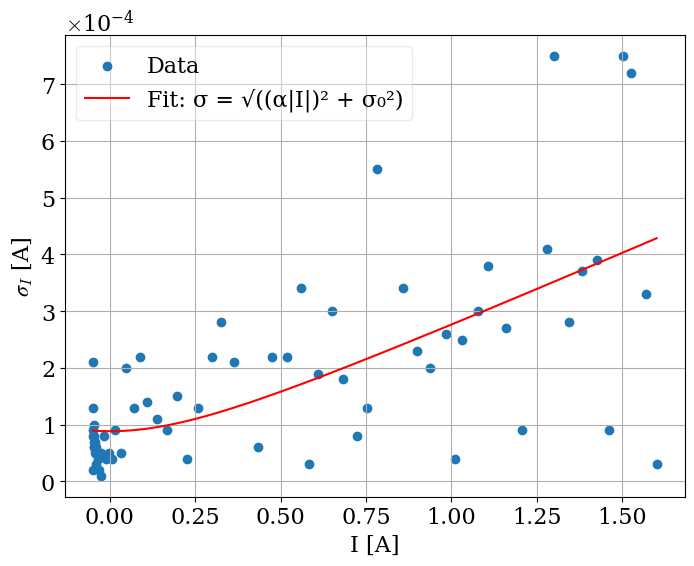

In [ ]:
path2 = "/Users/charlottemyers/projects/jlab/photoelectric/data/uncertainties.csv"

df2 = pd.read_csv(path2, sep=",")
print(df2.columns.tolist())
sig = df2["I uncertainty (A)"].to_numpy()
I = df2["I(A)"].to_numpy()
V = df2["V(V)"].to_numpy()
rel_sig = sig/I

### apply mask of sig < 0.001:
mask = sig < 0.0008
sig = sig[mask]
I = I[mask]

fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(I, sig, label = 'Data')

def sigma_model(I, alpha, sigma0):
    return np.sqrt((alpha*np.abs(I))**2 + sigma0**2)

# initial guesses: slope from large |I|, floor from small |I|
alpha0 = np.percentile(sig[np.argsort(np.abs(I))[-10:]] / (np.abs(I[np.argsort(np.abs(I))[-10:]]) + 1e-12), 50)
sigma00 = np.percentile(sig[np.argsort(np.abs(I))[:10]], 50)

p0 = [max(alpha0, 1e-9), max(sigma00, 1e-12)]
popt, pcov = curve_fit(sigma_model, I, sig, p0=p0, bounds=([0,0],[np.inf,np.inf]))
alpha, sigma0 = popt
perr = np.sqrt(np.diag(pcov))
print(f"alpha = {alpha:.3g} ± {perr[0]:.3g},  sigma0 = {sigma0:.3g} ± {perr[1]:.3g}")

#plot the fit
I_fit = np.linspace(min(I), max(I), 1000)
sig_fit = sigma_model(I_fit, *popt)
plt.plot(I_fit, sig_fit, color='red', label='Fit: σ = √((α|I|)² + σ₀²)')


################# settings

from matplotlib.ticker import ScalarFormatter
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))  # force scientific w/ offset
sf = ScalarFormatter(useMathText=True)
sf.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(sf)

ax.set_xlabel("I [A]")
ax.set_ylabel("$σ_I$ [A]")  # axis will show ×10^{-4}

plt.legend(framealpha = 0.4)
plt.savefig("I_uncertainty_vs_I_fit.png", dpi=300)
#plt.yscale("log")
plt.grid()


In [ ]:
plt.figure()
plt.xlabel("Voltage (V)")

#noise floor = shot noise = sqrt(2 * e * I * delta_f)
e = 1.602176634e-19  # elementary charge in coulombs
delta_T = 3 #s
delta_f = 1/(delta_T) #Hz
shot_noise = np.sqrt(e * I * delta_f) # I is current in A
#plt.scatter(V, shot_noise, label="Shot Noise")
plt.scatter(V, sig, label="Data")
plt.yscale("log")
#######

plt.figure()
norm_I = I/np.max(I)
plt.scatter(norm_I, np.abs(rel_sig))
plt.xlabel("Normalized Current (I/I_max)")
plt.ylabel("Relative Uncertainty in Current")
plt.title("Relative Uncertainty in Current vs Voltage")
plt.yscale("log")